In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv(r'C:\Users\yatharth bansal\Desktop\IPL First Innings Score prediction\ipl.csv')

In [3]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
df.shape

(76014, 15)

In [5]:
c=['mid','venue','batsman','bowler','striker','non-striker']
df.drop(labels=c,axis=1,inplace=True)

In [6]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [7]:
df['bat_team'].value_counts()

Mumbai Indians                 10213
Kings XI Punjab                 9219
Chennai Super Kings             9142
Royal Challengers Bangalore     8331
Kolkata Knight Riders           8033
Delhi Daredevils                7152
Rajasthan Royals                6643
Deccan Chargers                 5280
Sunrisers Hyderabad             5216
Pune Warriors                   2448
Gujarat Lions                   1726
Rising Pune Supergiant           994
Kochi Tuskers Kerala             876
Rising Pune Supergiants          741
Name: bat_team, dtype: int64

In [8]:
#Keeping playing teams
teams=['Mumbai Indians','Kings XI Punjab','Chennai Super Kings',
       'Royal Challengers Bangalore','Kolkata Knight Riders',
      'Delhi Daredevils','Rajasthan Royals','Sunrisers Hyderabad',
      ]

In [9]:
df=df[(df['bat_team'].isin(teams)) & (df['bowl_team'].isin(teams))]

In [10]:
# Removeing the first 5 overs data in every match
df=df[df['overs']>=5.0]

In [11]:
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [12]:
#Converting  the column date from string to datetime object
from datetime import datetime
df['date']=df['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [13]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [14]:
# Using onehotencoding
encoded_df=pd.get_dummies(data=df,columns=['bat_team','bowl_team'])

In [15]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
encoded_df.columns


Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [17]:
encoded_df=encoded_df[['date','bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total']]

In [18]:
encoded_df.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,61,0,5.1,59,0,222
33,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,61,1,5.2,59,1,222
34,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,61,1,5.3,59,1,222
35,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,61,1,5.4,59,1,222
36,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,61,1,5.5,58,1,222


In [20]:
#Splitting the data
X_train=encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year <= 2016]
X_test=encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year >= 2017]


In [21]:
y_train=encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test=encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

In [22]:
X_train.drop(labels='date',axis=True,inplace=True)
X_test.drop(labels='date',axis=True,inplace=True)

In [26]:
import xgboost as xgb
from xgboost import XGBRegressor

In [27]:
model=XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
model.score(X_test,y_test)

0.6860325403407055

In [29]:
from sklearn.model_selection import GridSearchCV

In [47]:
param_grid={
   
    'learning_rate':[1,0.5,0.1],
    'max_depth': [3,5,10],
    'n_estimators':[10,50,100]
    
}

In [48]:
grid= GridSearchCV(estimator=model,param_grid=param_grid,scoring='neg_mean_squared_error' ,cv=5,verbose=3)

In [49]:
grid.fit(X_train,y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END ..learning_rate=1, max_depth=3, n_estimators=10; total time=   0.0s
[CV 2/5] END ..learning_rate=1, max_depth=3, n_estimators=10; total time=   0.0s
[CV 3/5] END ..learning_rate=1, max_depth=3, n_estimators=10; total time=   0.0s
[CV 4/5] END ..learning_rate=1, max_depth=3, n_estimators=10; total time=   0.0s
[CV 5/5] END ..learning_rate=1, max_depth=3, n_estimators=10; total time=   0.0s
[CV 1/5] END ..learning_rate=1, max_depth=3, n_estimators=50; total time=   0.1s
[CV 2/5] END ..learning_rate=1, max_depth=3, n_estimators=50; total time=   0.1s
[CV 3/5] END ..learning_rate=1, max_depth=3, n_estimators=50; total time=   0.1s
[CV 4/5] END ..learning_rate=1, max_depth=3, n_estimators=50; total time=   0.1s
[CV 5/5] END ..learning_rate=1, max_depth=3, n_estimators=50; total time=   0.2s
[CV 1/5] END .learning_rate=1, max_depth=3, n_estimators=100; total time=   0.3s
[CV 2/5] END .learning_rate=1, max_depth=3, n_e

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [50]:
grid.best_params_


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [52]:
new_model=XGBRegressor(learning_rate= 0.1, max_depth= 3,n_estimators=100)
new_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
new_model.score(X_test,y_test)


0.7155898189537134

In [54]:
prediction=new_model.predict(X_test)

c:\users\yatharth bansal\.conda\envs\iplscoreprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

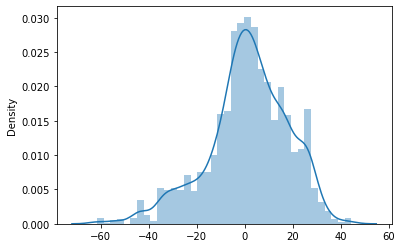

In [58]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [59]:
import pickle
file=open('ipl_prediction_model.pkl','wb')
pickle.dump(new_model,file)